In [90]:
import pandas as pd
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [91]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [92]:
data['Sex'].replace('M',0,inplace=True)
data['Sex'].replace('F',1,inplace=True)
data['Sex']=data['Sex'].astype('int64')

In [93]:
data['ExerciseAngina'].replace('N',0,inplace=True)
data['ExerciseAngina'].replace('Y',1,inplace=True)
data['ExerciseAngina']=data['ExerciseAngina'].astype('int64')

In [94]:
chest_col = pd.get_dummies(data['ChestPainType'])

resting_col = pd.get_dummies(data['RestingECG'])

slope_col = pd.get_dummies(data['ST_Slope'])

chest=chest_col.astype(int)
resting=resting_col.astype(int)
slope=slope_col.astype(int)

print(chest)  
print(resting)
print(slope)

     ASY  ATA  NAP  TA
0      0    1    0   0
1      0    0    1   0
2      0    1    0   0
3      1    0    0   0
4      0    0    1   0
..   ...  ...  ...  ..
913    0    0    0   1
914    1    0    0   0
915    1    0    0   0
916    0    1    0   0
917    0    0    1   0

[918 rows x 4 columns]
     LVH  Normal  ST
0      0       1   0
1      0       1   0
2      0       0   1
3      0       1   0
4      0       1   0
..   ...     ...  ..
913    0       1   0
914    0       1   0
915    0       1   0
916    1       0   0
917    0       1   0

[918 rows x 3 columns]
     Down  Flat  Up
0       0     0   1
1       0     1   0
2       0     0   1
3       0     1   0
4       0     0   1
..    ...   ...  ..
913     0     1   0
914     0     1   0
915     0     1   0
916     0     1   0
917     0     0   1

[918 rows x 3 columns]


In [95]:

y = data['HeartDisease']

In [96]:
features_names=['Age','Sex','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak']
#будут использоваться для построение модели

In [97]:
X=pd.concat([data[features_names],chest,slope,resting],axis=1)#признакi
X.shape

(918, 17)

In [98]:
X.head(10)

,Age,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,NAP,TA,Down,Flat,Up,LVH,Normal,ST
0,40,0,289,0,172,0,0.0,0,1,0,0,0,0,1,0,1,0
1,49,1,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,0,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,1,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,0,195,0,122,0,0.0,0,0,1,0,0,0,1,0,1,0
5,39,0,339,0,170,0,0.0,0,0,1,0,0,0,1,0,1,0
6,45,1,237,0,170,0,0.0,0,1,0,0,0,0,1,0,1,0
7,54,0,208,0,142,0,0.0,0,1,0,0,0,0,1,0,1,0
8,37,0,207,0,130,1,1.5,1,0,0,0,0,1,0,0,1,0
9,48,1,284,0,120,0,0.0,0,1,0,0,0,0,1,0,1,0


In [99]:
print(X.dtypes)


Age                 int64
Sex                 int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ASY                 int64
ATA                 int64
NAP                 int64
TA                  int64
Down                int64
Flat                int64
Up                  int64
LVH                 int64
Normal              int64
ST                  int64
dtype: object


In [73]:
import numpy as np
print(np.any(np.isnan(X)))
print(np.any(np.isinf(X)))


False
False


In [74]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred = knn.predict(X_val)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [79]:
np.array(y_val)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [80]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.855072463768116

In [81]:
val_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train on the training data
    y_pred = knn.predict(X_val)  # Predict on the validation data
    acc_score = accuracy_score(y_pred, y_val)  # Compare with the validation labels
    
    val_scores.append(acc_score)


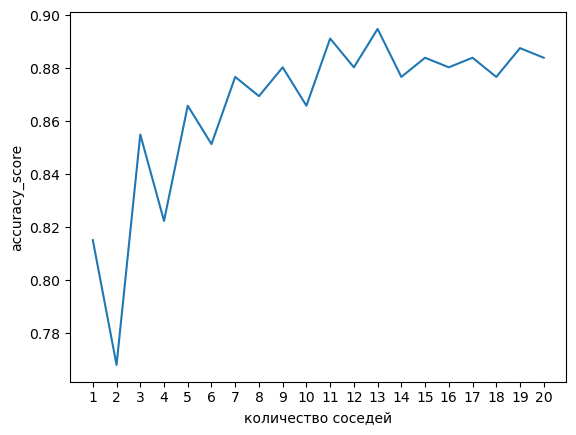

In [82]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,21)),val_scores)
plt.xticks(list(range(1,21)))
plt.xlabel('количество соседей')
plt.ylabel('accuracy_score')
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)

# Оценка модели: считаем среднюю квадратичную ошибку 
m = mean_squared_error(y_val, y_pred_lin)
print("Linear Regression (MSE):",m)


logistic = LogisticRegression(max_iter=1000)

logistic.fit(X_train, y_train)


y_pred_log = logistic.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_log)
print("Logistic Regression accuracy:", accuracy)


Linear Regression (MSE): 0.10196640286924157
Logistic Regression accuracy: 0.8804347826086957


In [84]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Коэффициент детерминации (R²)
r2 = lin_reg.score(X_val, y_val)
print("Linear Regression R-squared:", r2)

#  Точность для линейной регрессии 
tolerance = 0.1
correct_predictions = np.abs(y_pred_lin - y_val) <= tolerance
accuracy_lin = np.mean(correct_predictions)
print("Linear Regression accuracy (within ±0.1):", accuracy_lin)

 #Средняя абсолютная ошибка 
mae = mean_absolute_error(y_val, y_pred_lin)
print("Linear Regression MAE:", mae)


Linear Regression R-squared: 0.5771236549995999
Linear Regression accuracy (within ±0.1): 0.32608695652173914
Linear Regression MAE: 0.24175891447861825
